In [2]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import tnmpa.solvers.quimb_vbp as qbp

def contract_HTN_partition(tn):
    """
    Exactly contract the hyper tensor network to get the partition function.
    """
    import quimb.tensor as qtn
    tensor_list = []
    for tensor in tn.tensor_map.values():
        tensor_list.append(tensor)
    value = qtn.tensor_contract(*tensor_list, output_inds=[])
    return value

def compare_bp_exact_HTN_tree(Lx,Ly,Lz=0,Nx=10,Ny=10,Nz=10,beta=0.5,tol=1e-10,damping=False,eta=1e-2):
    """"""
    if Lz==0:
        # 2D
        tn = qtn.tensor_builder.HTN2D_classical_LennardJones_partition_function_spinrep(Lx=Lx,Ly=Ly,Nx=Nx,Ny=Ny,beta=beta)
    else:
        # 3D
        tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function_spinrep(Lx=Lx,Ly=Ly,Lz=Lz,Nx=Nx,Ny=Ny,Nz=Nz,beta=beta)
        
    tn.hyperinds_resolve_('tree','clustering')
    # Exact
    Z_exact = contract_HTN_partition(tn)
    entropy_exact = np.log(Z_exact)

    # BP
    messages, converged = qbp.run_belief_propagation(
    tn, 
    tol=tol,
    max_iterations=2000, 
    progbar=True,
    # you can parallelize but its not super efficient
    thread_pool=8,
    uniform=False,
    damping=damping,
    eta=eta,
    )
    entropy_bp = qbp.compute_free_entropy_from_messages(tn, messages)
    Z_bp =np.exp(entropy_bp)

    err = np.abs(entropy_exact-entropy_bp)/entropy_exact

    return err, Z_bp, Z_exact, entropy_bp, entropy_exact

def compare_bp_exact_HTN_dense(Lx,Ly,Lz=0,Nx=10,Ny=10,Nz=10,beta=0.5,tol=1e-10,damping=False,eta=1e-2):
    """"""
    if Lz==0:
        # 2D
        tn = qtn.tensor_builder.HTN2D_classical_LennardJones_partition_function_spinrep(Lx=Lx,Ly=Ly,Nx=Nx,Ny=Ny,beta=beta)
    else:
        # 3D
        tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function_spinrep(Lx=Lx,Ly=Ly,Lz=Lz,Nx=Nx,Ny=Ny,Nz=Nz,beta=beta)
        
    tn.hyperinds_resolve_('dense','clustering')
    # Exact
    Z_exact = contract_HTN_partition(tn)
    entropy_exact = np.log(Z_exact)

    # BP
    messages, converged = qbp.run_belief_propagation(
    tn, 
    tol=tol,
    max_iterations=2000, 
    progbar=True,
    # you can parallelize but its not super efficient
    thread_pool=8,
    uniform=False,
    damping=damping,
    eta=eta,
    )
    entropy_bp = qbp.compute_free_entropy_from_messages(tn, messages)
    Z_bp =np.exp(entropy_bp)

    err = np.abs(entropy_exact-entropy_bp)/entropy_exact

    return err, Z_bp, Z_exact, entropy_bp, entropy_exact

def compare_bp_exact_HTN(Lx,Ly,Lz=0,Nx=10,Ny=10,Nz=10,beta=0.5,tol=1e-10,damping=False,eta=1e-2):
    """"""
    if Lz==0:
        # 2D
        tn = qtn.tensor_builder.HTN2D_classical_LennardJones_partition_function_spinrep(Lx=Lx,Ly=Ly,Nx=Nx,Ny=Ny,beta=beta)
    else:
        # 3D
        tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function_spinrep(Lx=Lx,Ly=Ly,Lz=Lz,Nx=Nx,Ny=Ny,Nz=Nz,beta=beta)
        

    # Exact
    Z_exact = contract_HTN_partition(tn)
    entropy_exact = np.log(Z_exact)

    # BP
    messages, converged = qbp.run_belief_propagation(
    tn, 
    tol=tol,
    max_iterations=2000, 
    progbar=True,
    # you can parallelize but its not super efficient
    thread_pool=8,
    uniform=False,
    damping=damping,
    eta=eta,
    )
    entropy_bp = qbp.compute_free_entropy_from_messages(tn, messages)
    Z_bp =np.exp(entropy_bp)

    err = np.abs(entropy_exact-entropy_bp)/entropy_exact

    return err, Z_bp, Z_exact, entropy_bp, entropy_exact

def compare_bp_exact_HTN_mps(Lx,Ly,Lz=0,Nx=10,Ny=10,Nz=10,beta=0.5,tol=1e-10,damping=False,eta=1e-2):
    """"""
    if Lz==0:
        # 2D
        tn = qtn.tensor_builder.HTN2D_classical_LennardJones_partition_function_spinrep(Lx=Lx,Ly=Ly,Nx=Nx,Ny=Ny,beta=beta)
    else:
        # 3D
        tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function_spinrep(Lx=Lx,Ly=Ly,Lz=Lz,Nx=Nx,Ny=Ny,Nz=Nz,beta=beta)
        
    tn.hyperinds_resolve_('mps','clustering')
    # Exact
    Z_exact = contract_HTN_partition(tn)
    entropy_exact = np.log(Z_exact)

    # BP
    messages, converged = qbp.run_belief_propagation(
    tn, 
    tol=tol,
    max_iterations=2000, 
    progbar=True,
    # you can parallelize but its not super efficient
    thread_pool=8,
    uniform=False,
    damping=damping,
    eta=eta,
    )
    entropy_bp = qbp.compute_free_entropy_from_messages(tn, messages)
    Z_bp =np.exp(entropy_bp)

    err = np.abs(entropy_exact-entropy_bp)/entropy_exact

    return err, Z_bp, Z_exact, entropy_bp, entropy_exact

def BP_HTN(Lx,Ly,Lz=0,Nx=10,Ny=10,Nz=10,beta=0.5,tol=1e-10,damping=False,eta=1e-2,mode=None):
    """
        mode: 'tree','dense','mps'
    """
    if Lz==0:
        # 2D
        tn = qtn.tensor_builder.HTN2D_classical_LennardJones_partition_function_spinrep(Lx=Lx,Ly=Ly,Nx=Nx,Ny=Ny,beta=beta)
    else:
        # 3D
        tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function_spinrep(Lx=Lx,Ly=Ly,Lz=Lz,Nx=Nx,Ny=Ny,Nz=Nz,beta=beta)
        

    if mode is not None:
        tn.hyperinds_resolve_(mode,'clustering')

    # BP
    messages, converged = qbp.run_belief_propagation(
    tn, 
    tol=tol,
    max_iterations=2000, 
    progbar=True,
    # you can parallelize but its not super efficient
    thread_pool=8,
    uniform=False,
    damping=damping,
    eta=eta,
    )
    entropy_bp = qbp.compute_free_entropy_from_messages(tn, messages)
    Z_bp =np.exp(entropy_bp)


    return Z_bp, entropy_bp

/home/sijingdu/anaconda3/envs/tnmpa/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [9]:
tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function_spinrep(
    Lx=7,Ly=7,Lz=7,
    beta=1e-2,
    Nx=8,Ny=8,Nz=8,
    cutoff=2.0,
    epsilon=1.0,
    sigma=1.0
    )
# partition.hyperinds_resolve_('dense')
# for tensor in partition.tensors:
#     if len(tensor.inds)>2:
#         tensor.modify(tags='COPY')
# partition.draw(color='COPY')
# BP

messages, converged = qbp.run_belief_propagation(
tn, 
tol=1e-6,
max_iterations=2000, 
progbar=True,
# you can parallelize but its not super efficient
thread_pool=8,
uniform=False,
damping=True,
eta=1e-2,
)
entropy_bp = qbp.compute_free_entropy_from_messages(tn, messages)


# Z_bp =np.exp(entropy_bp)

max_dm=9.001824550214366e-07:   1%|▏         | 27/2000 [00:00<00:20, 97.05it/s]  


### Computing the marginals from BP and magnetization

In [1]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import tnmpa.solvers.quimb_vbp as qbp
import sys

L = 1
N_a = 2
N = N_a**3  # Total number of lattice
T = 2
beta = 1/T

cutoff = 3.0  # Cutoff distance for LJ potential
epsilon = 1.0  # Depth of the potential well/ Energy scale
sigma = 1.0  # Length scale in LJ potential, also the distance at which the potential becomes zero

def contract_HTN_partition(tn):
    """
    Exactly contract the hyper tensor network to get the partition function.
    """
    import quimb.tensor as qtn
    tensor_list = []
    for tensor in tn.tensor_map.values():
        tensor_list.append(tensor)
    value = qtn.tensor_contract(*tensor_list, output_inds=[])
    return value

def fix_ind(TN,ind,ind_value):
    """
        Fix the value of an index in a tensor network. Return the modified tensor network with corresponding index dimension reduced to 1.
    """
    tn = TN.copy()
    tn_no_list = list(tn.ind_map[(ind)])
    for tn_no in tn_no_list:
        temp_ind_list = list(tn.tensors[tn_no].inds)
        ind_pos = temp_ind_list.index(ind)
        inds = list(tn.tensors[tn_no].inds)
        inds.pop(ind_pos) # Remove the fixed index
        shape = list(tn.tensors[tn_no].shape)
        shape.pop(ind_pos) # Remove the dimension of the fixed index
        data = tn.tensors[tn_no].data
        # Create a list of slices
        slices = [slice(None)] * data.ndim  # Start with all slices set to ':'
        slices[ind_pos] = slice(ind_value, ind_value + 1)  # Fix the i-th dimension
        new_data = data[tuple(slices)].reshape(shape) # Reduce the dimension of the tensor data
        tn.tensors[tn_no].modify(data=new_data,inds=tuple(inds))
    return tn

def marginals_from_messages(messages):
    marginals = []
    # first half of messages is the factor to index messages
    fac_ind_messages = list(messages.items())[:len(messages)//2]
    ind_messages = dict() # dictionary of ind:list of incoming messages
    list_cache = []
    ind_cache = None
    for pair_message in fac_ind_messages: # pair_message: ((factor,ind),message)
        ind = pair_message[0][1]
        message = pair_message[1]
        # Initial step
        if ind_cache is None:
            ind_cache = ind
            list_cache.append(message)
        else:
            if ind_cache==ind:
                list_cache.append(message)
            else:
                ind_messages[ind_cache] = list_cache.copy()
                # Compute the marginals for this ind_cache
                local_Z = 0
                message_product = np.ones((2))
                for messagex in ind_messages[ind_cache]:
                    message_product *= np.array(messagex)
                local_Z = np.sum(message_product)
                marginals.append(message_product[0]/local_Z)
                # Reset
                ind_cache = ind
                list_cache = [message]
                
    # Last ind
    ind_messages[ind_cache] = list_cache.copy()
    # Compute the marginals for last ind_cache
    local_Z = 0
    message_product = np.ones((2))
    for message in ind_messages[ind_cache]:
        message_product *= np.array(message)
    local_Z = np.sum(message_product)
    marginals.append(message_product[0]/local_Z)
    
    return marginals

def magnetization_LJ_BP(T, L=L, N_a=N_a, cutoff=cutoff, epsilon=epsilon, sigma=sigma):
    """
        Compute the magnetization of the Lennard-Jones model using belief propagation.
    """
    beta = 1/T
    tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function_spinrep(
    Lx=L,Ly=L,Lz=L,
    beta=beta,
    Nx=N_a,Ny=N_a,Nz=N_a,
    cutoff=cutoff,
    epsilon=epsilon,
    sigma=sigma,
    )

    # BP
    converged = False
    tol = 3e-15
    count = 0

    while not converged:
        if count > 0:
            tol *= 10

        messages, converged = qbp.run_belief_propagation(
        tn, 
        tol=tol,
        max_iterations=500, 
        progbar=False,
        thread_pool=8,
        uniform=False,
        damping=False,
        eta=1e-2,
        )
        count += 1
    entropy_bp = qbp.compute_free_entropy_from_messages(tn, messages)

    marginals = []

    for ind in list(tn.ind_map.keys()):
        partial_tn = fix_ind(tn,ind,0)

        # BP
        converged = False
        tol = 3e-15
        count = 0

        while not converged:
            if count > 0:
                tol *= 10

            messages, converged = qbp.run_belief_propagation(
            partial_tn, 
            tol=tol,
            max_iterations=500, 
            progbar=False,
            thread_pool=8,
            uniform=False,
            damping=False,
            eta=1e-2,
            )
            count += 1
        partial_entropy_bp = qbp.compute_free_entropy_from_messages(partial_tn, messages)
        marginals.append(np.exp(partial_entropy_bp-entropy_bp))

    total_m = 0
    for p in marginals:
        total_m += 1-2*p
    M = total_m/N

    marginals_messages = marginals_from_messages(messages)

    M_from_messages = np.sum(np.ones(len(marginals_messages))-2*np.array(marginals_messages))/N
    return M, M_from_messages

tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function_spinrep(
Lx=L,Ly=L,Lz=L,
beta=beta,
Nx=N_a,Ny=N_a,Nz=N_a,
cutoff=cutoff,
epsilon=epsilon,
sigma=sigma,
)

# BP
converged = False
tol = 3e-15
count = 0

while not converged:
    if count > 0:
        tol *= 10

    messages, converged = qbp.run_belief_propagation(
    tn, 
    tol=tol,
    max_iterations=500, 
    progbar=True,
    thread_pool=8,
    uniform=False,
    damping=False,
    eta=1e-2,
    )
    count += 1
# entropy_bp = qbp.compute_free_entropy_from_messages(tn, messages)

/home/sijingdu/anaconda3/envs/tnmpa/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
max_dm=2.3314683517128287e-15:   3%|▎         | 15/500 [00:00<00:00, 486.14it/s]


In [172]:
marginals = marginals_from_messages(messages)

In [173]:
marginals

[0.7048267943968808,
 0.7048267943968808,
 0.7048267943968809,
 0.7048267943968809,
 0.7048267943968808,
 0.7048267943968808,
 0.7048267943968809,
 0.7048267943968809]

In [126]:
L = 2
N_a = 3
N = N_a**3  # Total number of lattice
cutoff = 3.0  # Cutoff distance for LJ potential
epsilon = 1.0  # Depth of the potential well/ Energy scale
sigma = 1.0  # Length scale in LJ potential, also the distance at which the potential becomes zero

T_list = np.arange(5, 40, 1)
M_list=[]
M_from_messages_list=[]
for T in T_list:
    M, M_from_messages = magnetization_LJ_BP(T=T, L=L, N_a=N_a, cutoff=cutoff, epsilon=epsilon, sigma=sigma)
    print(f'T={T}, M={M}, M_from_messages={M_from_messages}')
    M_list.append(M)
    M_from_messages_list.append(M_from_messages)

T=5, M=-0.34084636948493713, M_from_messages=-0.33491909584016066
T=6, M=-0.28160818754703976, M_from_messages=-0.2770768630732056
T=7, M=-0.23917350942127993, M_from_messages=-0.2355332896130509
T=8, M=-0.2075183175486494, M_from_messages=-0.20448692549455139
T=9, M=-0.18309594883756067, M_from_messages=-0.1805033662358973
T=10, M=-0.16372644698065789, M_from_messages=-0.1614636922033511
T=11, M=-0.1480110376922703, M_from_messages=-0.14600459805824698
T=12, M=-0.13501675741557853, M_from_messages=-0.13321492860293785
T=13, M=-0.12409992422768255, M_from_messages=-0.12246506277762019
T=14, M=-0.11480322890074351, M_from_messages=-0.11330712697714301
T=15, M=-0.10679340326303997, M_from_messages=-0.10541440329665132
T=16, M=-0.09982213307812889, M_from_messages=-0.09854325848953815
T=17, M=-0.09370077440095276, M_from_messages=-0.09250847839166819
T=18, M=-0.08828354000195696, M_from_messages=-0.08716684392134054
T=19, M=-0.08345603909595066, M_from_messages=-0.08240592414249297
T=20, 

FileNotFoundError: [Errno 2] No such file or directory: './magnetization/M_L=2_N_a=3.npy'

In [132]:
#Save data
M_list = np.array(M_list)
M_from_messages_list = np.array(M_from_messages_list)
T_list = np.array(T_list)
np.save(f'./magnetization_BP/M_L={L}_N_a={N_a}.npy', M_list)
np.save(f'./magnetization_BP/M_from_messages_L={L}_N_a={N_a}.npy', M_from_messages_list)
np.save(f'./magnetization_BP/T_L={L}_N_a={N_a}.npy', T_list)

### Occupation number basis BP

About 1 min to construct a 15x15x15 LJ spin basis partition function TN.

In [247]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import tnmpa.solvers.quimb_vbp as qbp

a = 0.75
N_a = 15
L = N_a*a - a
N = N_a**3  # Total number of lattice
T = 2

cutoff = 3.0  # Cutoff distance for LJ potential
epsilon = 1.0  # Depth of the potential well/ Energy scale
sigma = 1.0  # Length scale in LJ potential, also the distance at which the potential becomes zero

tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function(
Lx=L,Ly=L,Lz=L,
beta=beta,
Nx=N_a,Ny=N_a,Nz=N_a,
cutoff=cutoff,
epsilon=epsilon,
sigma=sigma,
)

# BP
converged = False
tol = 1e-9
count = 0
max_dm = 0
damping_eta = 0
max_dm_cache = 0
messages_cache = None

beta = 1/T

while not converged:

    tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function(
    Lx=L,Ly=L,Lz=L,
    beta=beta,
    Nx=N_a,Ny=N_a,Nz=N_a,
    cutoff=cutoff,
    epsilon=epsilon,
    sigma=sigma,
    uv_cutoff=False,
    )

    print('Successfully built the HTN.')

    messages, converged, max_dm = qbp.run_belief_propagation(
    tn, 
    tol=tol,
    max_iterations=1000, 
    messages=messages_cache,
    progbar=True,
    thread_pool=8,
    uniform=False,
    damping=True,
    eta=damping_eta,
    show_max_dm=True,
    )

    count += 1
    if count % 5 == 0:
        tol *= 10
    if count > 0:
        damping_eta += 2e-3

    if count > 5 and max_dm > max_dm_cache or tol >= 1e-1:
        print(f'T={T}, Max_dm={max_dm}, Entropy={qbp.compute_free_entropy_from_messages(tn, messages)}, Not Converged!')
        converged = False
        break

    max_dm_cache = max_dm

    messages_cache = messages

entropy_bp = qbp.compute_free_entropy_from_messages(tn, messages)

if converged:
    print(f'T={T}, Entropy = {entropy_bp}, Converged={converged}, damping={damping_eta - 2e-3}')

Successfully built the HTN.


max_dm=2.9746373420014294e-10:  10%|▉         | 96/1000 [00:09<01:29, 10.12it/s]


T=2, Entropy = 5642.672776694702, Converged=True, damping=0.0


max_dm=0.9999995678623068: 100%|██████████| 100/100 [00:00<00:00, 691.11it/s]


L=0.1, T=1, Entropy = -82.26134638288741, Converged=False


max_dm=0.9999995678623068: 100%|██████████| 100/100 [00:00<00:00, 746.34it/s]


L=0.25263157894736843, T=1, Entropy = -82.26134638288741, Converged=False


max_dm=0.9999995678623068: 100%|██████████| 100/100 [00:00<00:00, 746.46it/s]


L=0.4052631578947369, T=1, Entropy = -82.26134638288741, Converged=False


max_dm=0.999999538747795: 100%|██████████| 100/100 [00:00<00:00, 679.37it/s]


L=0.5578947368421052, T=1, Entropy = -81.84914773396261, Converged=False


max_dm=0.9999320310647342: 100%|██████████| 100/100 [00:00<00:00, 722.96it/s]


L=0.7105263157894737, T=1, Entropy = -60.27334627548185, Converged=False


max_dm=0.9873497380290182: 100%|██████████| 100/100 [00:00<00:00, 731.40it/s]


L=0.8631578947368421, T=1, Entropy = -22.23945026987352, Converged=False


max_dm=1.9987681316060353: 100%|██████████| 100/100 [00:00<00:00, 737.68it/s]


L=1.0157894736842106, T=1, Entropy = -85.13670474238415, Converged=False


max_dm=0.7614648034024281: 100%|██████████| 100/100 [00:00<00:00, 736.84it/s]


L=1.168421052631579, T=1, Entropy = 17.176384245682694, Converged=False


max_dm=7.688434611186068e-11:  20%|██        | 20/100 [00:00<00:00, 715.62it/s]


L=1.3210526315789475, T=1, Entropy = 16.823912098888016, Converged=True


max_dm=1.082538399199695e-11:  16%|█▌        | 16/100 [00:00<00:00, 694.97it/s]


L=1.473684210526316, T=1, Entropy = 31.963222585439595, Converged=True


max_dm=1.7745582347322708e-11:  13%|█▎        | 13/100 [00:00<00:00, 589.93it/s]


L=1.6263157894736844, T=1, Entropy = 39.514349406738084, Converged=True


max_dm=8.356368375039835e-11:  13%|█▎        | 13/100 [00:00<00:00, 470.03it/s]


L=1.7789473684210528, T=1, Entropy = 30.581378283749203, Converged=True


max_dm=7.131803481108534e-11:  33%|███▎      | 33/100 [00:00<00:00, 464.01it/s]

L=1.931578947368421, T=1, Entropy = 21.68763570982084, Converged=True



max_dm=4.4805825716309755e-12:   9%|▉         | 9/100 [00:00<00:00, 337.68it/s]


L=2.0842105263157893, T=1, Entropy = 70.13085297481152, Converged=True


max_dm=2.8001823082490773e-11:   8%|▊         | 8/100 [00:00<00:00, 345.37it/s]

L=2.236842105263158, T=1, Entropy = 76.2483022909768, Converged=True

max_dm=6.61282140157482e-12:  10%|█         | 10/100 [00:00<00:00, 360.38it/s]


L=2.3894736842105266, T=1, Entropy = 64.26290266548814, Converged=True


max_dm=4.804412423453641e-11:  11%|█         | 11/100 [00:00<00:00, 328.48it/s]


L=2.542105263157895, T=1, Entropy = 50.40671771835026, Converged=True


max_dm=2.42633968472461e-11:  14%|█▍        | 14/100 [00:00<00:00, 353.38it/s]


L=2.694736842105263, T=1, Entropy = 39.25050636699228, Converged=True


max_dm=9.815948054381352e-11:  15%|█▌        | 15/100 [00:00<00:00, 384.07it/s]


L=2.8473684210526318, T=1, Entropy = 31.912322834711986, Converged=True


max_dm=4.299538503005351e-11:  16%|█▌        | 16/100 [00:00<00:00, 355.57it/s]


L=3.0, T=1, Entropy = 27.20943424135909, Converged=True


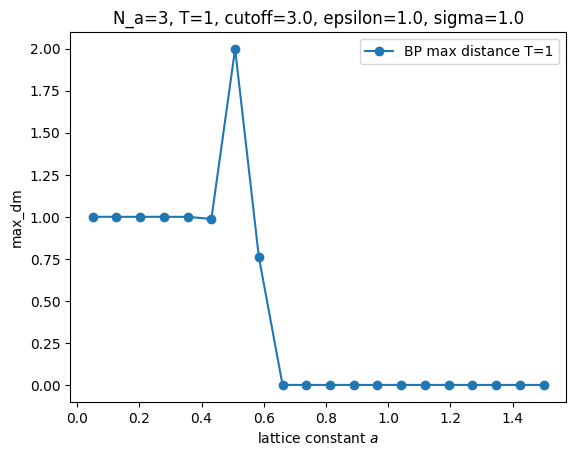

max_dm=0.9999995678623068: 100%|██████████| 100/100 [00:00<00:00, 760.01it/s]


L=0.1, T=5, Entropy = -82.26134638288741, Converged=False


max_dm=0.9999995678623068: 100%|██████████| 100/100 [00:00<00:00, 757.72it/s]


L=0.25263157894736843, T=5, Entropy = -82.26134638288741, Converged=False


max_dm=0.9999995678623068: 100%|██████████| 100/100 [00:00<00:00, 743.26it/s]


L=0.4052631578947369, T=5, Entropy = -82.26134638288741, Converged=False


max_dm=0.9999994854764529: 100%|██████████| 100/100 [00:00<00:00, 701.72it/s]


L=0.5578947368421052, T=5, Entropy = -81.22366556752142, Converged=False


max_dm=0.9999808207755496: 100%|██████████| 100/100 [00:00<00:00, 720.95it/s]


L=0.7105263157894737, T=5, Entropy = -66.20681162277197, Converged=False


max_dm=0.9969551427080696: 100%|██████████| 100/100 [00:00<00:00, 728.32it/s]


L=0.8631578947368421, T=5, Entropy = -33.451481915418604, Converged=False


max_dm=0.9282407292705259: 100%|██████████| 100/100 [00:00<00:00, 721.89it/s]


L=1.0157894736842106, T=5, Entropy = -8.489557809150066, Converged=False


max_dm=0.8808037973590532: 100%|██████████| 100/100 [00:00<00:00, 728.16it/s]


L=1.168421052631579, T=5, Entropy = -2.4536587889840353, Converged=False


max_dm=0.04775426775073796: 100%|██████████| 100/100 [00:00<00:00, 708.67it/s]


L=1.3210526315789475, T=5, Entropy = 10.355328355507526, Converged=False


max_dm=8.27008461712353e-09: 100%|██████████| 100/100 [00:00<00:00, 721.63it/s] 


L=1.473684210526316, T=5, Entropy = 12.28136418312258, Converged=False


max_dm=2.437423041179443e-10: 100%|██████████| 100/100 [00:00<00:00, 686.91it/s]


L=1.6263157894736844, T=5, Entropy = 12.293698713580216, Converged=False


max_dm=1.4719300125476398e-05: 100%|██████████| 100/100 [00:00<00:00, 490.08it/s]


L=1.7789473684210528, T=5, Entropy = 12.858755346334373, Converged=False


max_dm=6.776568195476784e-11:  19%|█▉        | 19/100 [00:00<00:00, 443.60it/s]


L=1.931578947368421, T=5, Entropy = 18.238824112618765, Converged=True


max_dm=4.728106794971154e-11:  15%|█▌        | 15/100 [00:00<00:00, 397.14it/s]


L=2.0842105263157893, T=5, Entropy = 23.53264503297239, Converged=True


max_dm=3.352376709564453e-11:  15%|█▌        | 15/100 [00:00<00:00, 363.02it/s]


L=2.236842105263158, T=5, Entropy = 24.121752415303426, Converged=True


max_dm=2.3973600882243318e-11:  14%|█▍        | 14/100 [00:00<00:00, 367.44it/s]


L=2.3894736842105266, T=5, Entropy = 22.993718086379467, Converged=True


max_dm=3.374650558995995e-11:  12%|█▏        | 12/100 [00:00<00:00, 362.52it/s]


L=2.542105263157895, T=5, Entropy = 21.804359631557286, Converged=True


max_dm=3.095385059381783e-11:  11%|█         | 11/100 [00:00<00:00, 353.52it/s]


L=2.694736842105263, T=5, Entropy = 20.899448688270063, Converged=True


max_dm=2.0819734825039404e-11:   9%|▉         | 9/100 [00:00<00:00, 351.84it/s]


L=2.8473684210526318, T=5, Entropy = 20.289762560065085, Converged=True


max_dm=8.745948409938364e-12:   9%|▉         | 9/100 [00:00<00:00, 308.26it/s]


L=3.0, T=5, Entropy = 19.85659075010038, Converged=True


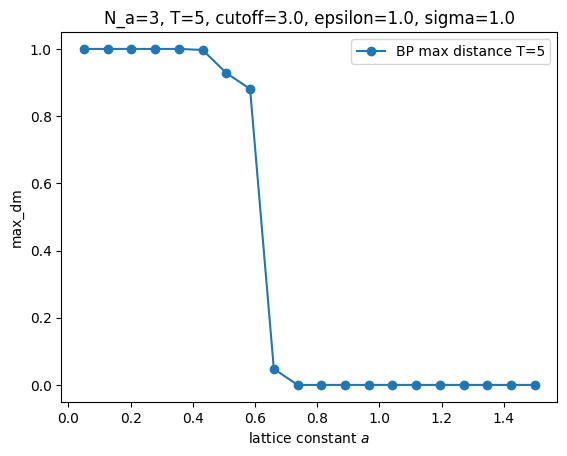

max_dm=0.9999995678623068: 100%|██████████| 100/100 [00:00<00:00, 732.31it/s]


L=0.1, T=10, Entropy = -82.26134638288741, Converged=False


max_dm=0.9999995678623068: 100%|██████████| 100/100 [00:00<00:00, 756.15it/s]


L=0.25263157894736843, T=10, Entropy = -82.26134638288741, Converged=False


max_dm=0.9999995678623068: 100%|██████████| 100/100 [00:00<00:00, 763.48it/s]


L=0.4052631578947369, T=10, Entropy = -82.26134638286014, Converged=False


max_dm=0.9999993705877569: 100%|██████████| 100/100 [00:00<00:00, 698.34it/s]


L=0.5578947368421052, T=10, Entropy = -80.33746061233965, Converged=False


max_dm=0.999970251044408: 100%|██████████| 100/100 [00:00<00:00, 694.24it/s]


L=0.7105263157894737, T=10, Entropy = -63.548596799113085, Converged=False


max_dm=0.9957885141597793: 100%|██████████| 100/100 [00:00<00:00, 689.33it/s]


L=0.8631578947368421, T=10, Entropy = -31.68716083481873, Converged=False


max_dm=0.9581793311103814: 100%|██████████| 100/100 [00:00<00:00, 757.34it/s]


L=1.0157894736842106, T=10, Entropy = -14.211145798281724, Converged=False


max_dm=0.9267737866056301: 100%|██████████| 100/100 [00:00<00:00, 752.24it/s]


L=1.168421052631579, T=10, Entropy = -6.702128556739842, Converged=False


max_dm=0.0008439504017490329: 100%|██████████| 100/100 [00:00<00:00, 725.31it/s]


L=1.3210526315789475, T=10, Entropy = 10.543076892541649, Converged=False


max_dm=1.1213322071990106e-06: 100%|██████████| 100/100 [00:00<00:00, 661.64it/s]


L=1.473684210526316, T=10, Entropy = 11.469041488739888, Converged=False


max_dm=1.3422370978566356e-05: 100%|██████████| 100/100 [00:00<00:00, 643.39it/s]


L=1.6263157894736844, T=10, Entropy = 11.650187835508353, Converged=False


max_dm=6.681222242121976e-11:  39%|███▉      | 39/100 [00:00<00:00, 458.93it/s]


L=1.7789473684210528, T=10, Entropy = 14.002855492755563, Converged=True


max_dm=3.7034986188899666e-11:  12%|█▏        | 12/100 [00:00<00:00, 409.73it/s]


L=1.931578947368421, T=10, Entropy = 18.440753050739332, Converged=True


max_dm=1.7575163546723616e-11:  11%|█         | 11/100 [00:00<00:00, 381.79it/s]


L=2.0842105263157893, T=10, Entropy = 20.75110596541762, Converged=True


max_dm=1.9645729487649533e-11:  11%|█         | 11/100 [00:00<00:00, 304.31it/s]


L=2.236842105263158, T=10, Entropy = 20.965786887634177, Converged=True


max_dm=1.5112966433861175e-11:  10%|█         | 10/100 [00:00<00:00, 329.90it/s]


L=2.3894736842105266, T=10, Entropy = 20.552898064552096, Converged=True


max_dm=3.815359139736074e-11:   9%|▉         | 9/100 [00:00<00:00, 308.02it/s]


L=2.542105263157895, T=10, Entropy = 20.091481967557026, Converged=True


max_dm=9.517003851655659e-11:   8%|▊         | 8/100 [00:00<00:00, 351.71it/s]


L=2.694736842105263, T=10, Entropy = 19.718388042842065, Converged=True


max_dm=4.119149465964256e-11:   7%|▋         | 7/100 [00:00<00:00, 333.99it/s]


L=2.8473684210526318, T=10, Entropy = 19.45452377839674, Converged=True


max_dm=7.889722208886951e-11:   6%|▌         | 6/100 [00:00<00:00, 376.37it/s]


L=3.0, T=10, Entropy = 19.25991727074161, Converged=True


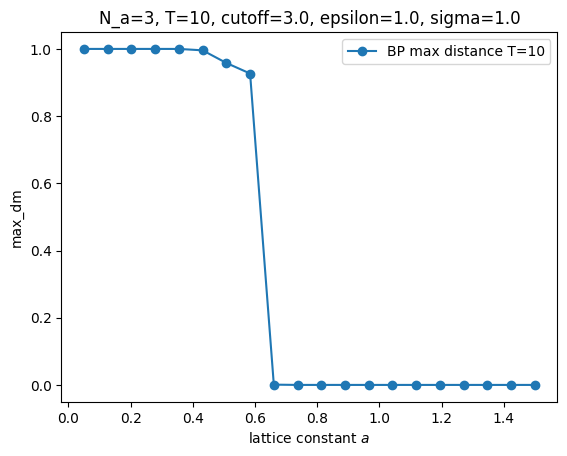

max_dm=0.9999995678623068: 100%|██████████| 100/100 [00:00<00:00, 748.15it/s]


L=0.1, T=20, Entropy = -82.26134638288741, Converged=False


max_dm=0.9999995678623068: 100%|██████████| 100/100 [00:00<00:00, 740.53it/s]


L=0.25263157894736843, T=20, Entropy = -82.26134638288741, Converged=False


max_dm=0.9999995678619025: 100%|██████████| 100/100 [00:00<00:00, 744.11it/s]


L=0.4052631578947369, T=20, Entropy = -82.2613403522521, Converged=False


max_dm=0.9999989703134725: 100%|██████████| 100/100 [00:00<00:00, 751.31it/s]


L=0.5578947368421052, T=20, Entropy = -78.23491197223105, Converged=False


max_dm=0.9999294551791377: 100%|██████████| 100/100 [00:00<00:00, 693.20it/s]


L=0.7105263157894737, T=20, Entropy = -58.412475443283036, Converged=False


max_dm=0.9933918093456182: 100%|██████████| 100/100 [00:00<00:00, 646.56it/s]


L=0.8631578947368421, T=20, Entropy = -29.11872505500657, Converged=False


max_dm=0.9604057551191842: 100%|██████████| 100/100 [00:00<00:00, 696.72it/s]


L=1.0157894736842106, T=20, Entropy = -14.755312799345107, Converged=False


max_dm=0.8940937929335142: 100%|██████████| 100/100 [00:00<00:00, 701.50it/s]


L=1.168421052631579, T=20, Entropy = -3.274473833331883, Converged=False


max_dm=1.0319185496293626e-05: 100%|██████████| 100/100 [00:00<00:00, 698.89it/s]


L=1.3210526315789475, T=20, Entropy = 10.709905294684653, Converged=False


max_dm=1.628663237607242e-08: 100%|██████████| 100/100 [00:00<00:00, 685.69it/s]


L=1.473684210526316, T=20, Entropy = 11.199636371401452, Converged=False


max_dm=9.696290992344814e-11:  75%|███████▌  | 75/100 [00:00<00:00, 706.74it/s]


L=1.6263157894736844, T=20, Entropy = 12.116595208415204, Converged=True


max_dm=6.657624451733568e-11:  18%|█▊        | 18/100 [00:00<00:00, 450.17it/s]


L=1.7789473684210528, T=20, Entropy = 15.526127493183857, Converged=True


max_dm=1.4790668689812492e-11:   8%|▊         | 8/100 [00:00<00:00, 382.98it/s]


L=1.931578947368421, T=20, Entropy = 18.568684196477122, Converged=True


max_dm=3.168176831991332e-11:   8%|▊         | 8/100 [00:00<00:00, 350.45it/s]


L=2.0842105263157893, T=20, Entropy = 19.65558061329336, Converged=True


max_dm=2.6242841233425906e-11:   8%|▊         | 8/100 [00:00<00:00, 290.20it/s]


L=2.236842105263158, T=20, Entropy = 19.74688469540603, Converged=True


max_dm=8.145351060306893e-11:   7%|▋         | 7/100 [00:00<00:00, 364.72it/s]


L=2.3894736842105266, T=20, Entropy = 19.57006617807466, Converged=True


max_dm=2.7126745294481225e-11:   7%|▋         | 7/100 [00:00<00:00, 307.93it/s]


L=2.542105263157895, T=20, Entropy = 19.36637753148115, Converged=True


max_dm=4.653943896926194e-12:   7%|▋         | 7/100 [00:00<00:00, 336.72it/s]


L=2.694736842105263, T=20, Entropy = 19.19659686220648, Converged=True


max_dm=4.4409476096518574e-11:   6%|▌         | 6/100 [00:00<00:00, 361.37it/s]


L=2.8473684210526318, T=20, Entropy = 19.07366377803935, Converged=True


max_dm=5.420369708630801e-11:   5%|▌         | 5/100 [00:00<00:00, 302.92it/s]

L=3.0, T=20, Entropy = 18.98133824608271, Converged=True


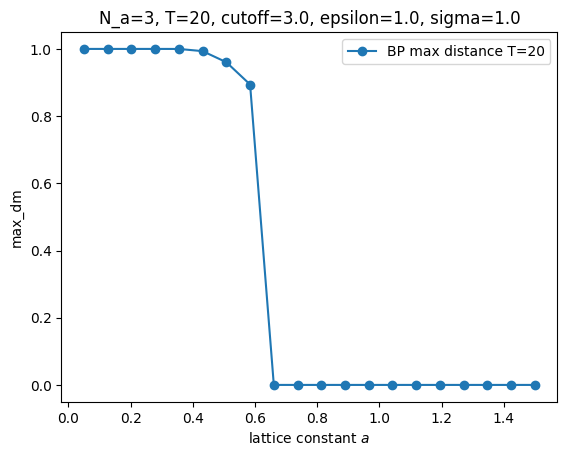

In [212]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import tnmpa.solvers.quimb_vbp as qbp
import sys

L_list = np.linspace(0.1, 3, 20)
T_list = [1, 5, 10, 20]

for T in T_list:
    max_dm_list = []
    spaceing_list = []
    for L in L_list:
    # L = 1.5
        N_a = 3
        N = N_a**3  # Total number of lattice
        # T = 10
        beta = 1/T

        cutoff = 3.0  # Cutoff distance for LJ potential
        epsilon = 1.0  # Depth of the potential well/ Energy unit scale
        sigma = 1.0  # Length scale in LJ potential, also the distance at which the potential becomes zero

        def contract_HTN_partition(tn):
            """
            Exactly contract the hyper tensor network to get the partition function.
            """
            import quimb.tensor as qtn
            tensor_list = []
            for tensor in tn.tensor_map.values():
                tensor_list.append(tensor)
            value = qtn.tensor_contract(*tensor_list, output_inds=[])
            return value

        tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function(
            Lx=L,Ly=L,Lz=L,
            beta=beta,
            Nx=N_a,Ny=N_a,Nz=N_a,
            cutoff=cutoff,
            epsilon=epsilon,
            sigma=sigma,
            uv_cutoff=False,
            )

        # print('Successfully built the HTN.')

        # entropy_exact = np.log(contract_HTN_partition(tn))

        for _ in range(1):
            # BP
            converged = False
            tol = 1e-10
            count = 0
            max_dm = 0
            damping_eta = 0
            max_dm_cache = 0

            messages, converged, max_dm = qbp.run_belief_propagation(
            tn, 
            tol=tol,
            max_iterations=100, 
            progbar=True,
            thread_pool=8,
            uniform=False,
            damping=True,
            eta=damping_eta,
            show_max_dm=True,
            )
            max_dm_list.append(max_dm)
            spaceing_list.append(L/(N_a-1))

            entropy_bp = qbp.compute_free_entropy_from_messages(tn, messages)

            if damping_eta > 0:
                print(f'L={L}, T={T}, Entropy = {entropy_bp}, Converged={converged}, damping={damping_eta}')
            else:
                print(f'L={L}, T={T}, Entropy = {entropy_bp}, Converged={converged}')

            # print('Exact Entropy:',entropy_exact)

    # Plot max_dm vs L
    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(spaceing_list, max_dm_list, 'o-', label=f'BP max distance T={T}')
    ax.set_xlabel(r'lattice constant $a$')
    ax.set_ylabel('max_dm')
    ax.set_title(f'N_a={N_a}, T={T}, cutoff={cutoff}, epsilon={epsilon}, sigma={sigma}')
    ax.legend()
    plt.show()



In [1]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import tnmpa.solvers.quimb_vbp as qbp
import sys

L_list = np.linspace(5, 10, 20)
T_list = [1, 10]
data_T = []
for T in T_list:
    max_dm_list = []
    spaceing_list = []
    for L in L_list:
    # L = 1.5
        N_a = 10
        N = N_a**3  # Total number of lattice
        # T = 10
        beta = 1/T

        cutoff = 3.0  # Cutoff distance for LJ potential
        epsilon = 1.0  # Depth of the potential well/ Energy unit scale
        sigma = 1.0  # Length scale in LJ potential, also the distance at which the potential becomes zero

        def contract_HTN_partition(tn):
            """
            Exactly contract the hyper tensor network to get the partition function.
            """
            import quimb.tensor as qtn
            tensor_list = []
            for tensor in tn.tensor_map.values():
                tensor_list.append(tensor)
            value = qtn.tensor_contract(*tensor_list, output_inds=[])
            return value

        tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function(
            Lx=L,Ly=L,Lz=L,
            beta=beta,
            Nx=N_a,Ny=N_a,Nz=N_a,
            cutoff=cutoff,
            epsilon=epsilon,
            sigma=sigma,
            uv_cutoff=False,
            )

        print('Successfully built the HTN.')

        # entropy_exact = np.log(contract_HTN_partition(tn))

        for _ in range(1):
            # BP
            converged = False
            tol = 1e-10
            count = 0
            max_dm = 0
            damping_eta = 0
            max_dm_cache = 0

            messages, converged, max_dm = qbp.run_belief_propagation(
            tn, 
            tol=tol,
            max_iterations=100, 
            progbar=True,
            thread_pool=8,
            uniform=False,
            damping=True,
            eta=damping_eta,
            show_max_dm=True,
            )
            max_dm_list.append(max_dm)
            spaceing_list.append(L/(N_a-1))

            entropy_bp = qbp.compute_free_entropy_from_messages(tn, messages)

            if damping_eta > 0:
                print(f'L={L}, T={T}, Entropy = {entropy_bp}, Converged={converged}, damping={damping_eta}')
            else:
                print(f'L={L}, T={T}, Entropy = {entropy_bp}, Converged={converged}')

            # print('Exact Entropy:',entropy_exact)
    data_T.append([spaceing_list, max_dm_list])
    # # Plot max_dm vs L
    # import matplotlib.pyplot as plt
    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # ax.plot(spaceing_list, max_dm_list, 'o-', label=f'BP max distance')
    # ax.set_xlabel(r'lattice constant $a$')
    # ax.set_ylabel(f'BP max message distance')
    # ax.set_title(f'N_a={N_a}, T={T}, cutoff $\Lambda$={cutoff}')
    # ax.legend()
    # plt.show()



/home/sijingdu/anaconda3/envs/tnmpa/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


Successfully built the HTN.


max_dm=1.0577695912214085: 100%|██████████| 100/100 [00:10<00:00,  9.62it/s]


L=5.0, T=1, Entropy = -55679.982190093695, Converged=False
Successfully built the HTN.


max_dm=1.0148258518702948: 100%|██████████| 100/100 [00:08<00:00, 11.16it/s]


L=5.2631578947368425, T=1, Entropy = -45364.98146960225, Converged=False
Successfully built the HTN.


max_dm=1.427139422474831: 100%|██████████| 100/100 [00:07<00:00, 12.78it/s]


L=5.526315789473684, T=1, Entropy = -32567.916282527905, Converged=False
Successfully built the HTN.


max_dm=1.2242200157017638: 100%|██████████| 100/100 [00:07<00:00, 12.63it/s]


L=5.7894736842105265, T=1, Entropy = -15059.239793468627, Converged=False
Successfully built the HTN.


max_dm=7.949529923223508e-12:  41%|████      | 41/100 [00:03<00:04, 12.69it/s] 


L=6.052631578947368, T=1, Entropy = 1197.3367964455724, Converged=True
Successfully built the HTN.


max_dm=1.9993441567290893: 100%|██████████| 100/100 [00:07<00:00, 12.76it/s]


L=6.315789473684211, T=1, Entropy = 1034.2293255103007, Converged=False
Successfully built the HTN.


max_dm=6.794999285464343e-11:  38%|███▊      | 38/100 [00:02<00:04, 14.59it/s] 


L=6.578947368421053, T=1, Entropy = 2612.720857957617, Converged=True
Successfully built the HTN.


max_dm=1.2435250312109458e-12:  32%|███▏      | 32/100 [00:01<00:03, 18.59it/s]


L=6.842105263157895, T=1, Entropy = 3152.4114458088334, Converged=True
Successfully built the HTN.


max_dm=9.468592359826444e-12:  36%|███▌      | 36/100 [00:01<00:03, 20.96it/s] 


L=7.105263157894736, T=1, Entropy = 3178.787334509454, Converged=True
Successfully built the HTN.


max_dm=6.13223577819455e-12:  42%|████▏     | 42/100 [00:01<00:02, 24.20it/s] 


L=7.368421052631579, T=1, Entropy = 2938.983916115176, Converged=True
Successfully built the HTN.


max_dm=0.33148830058746814: 100%|██████████| 100/100 [00:04<00:00, 22.51it/s]


L=7.631578947368421, T=1, Entropy = 2218.1160142392064, Converged=False
Successfully built the HTN.


max_dm=0.1468393459386627: 100%|██████████| 100/100 [00:04<00:00, 22.35it/s]


L=7.894736842105263, T=1, Entropy = 1908.8972223234148, Converged=False
Successfully built the HTN.


max_dm=0.21815226011591637: 100%|██████████| 100/100 [00:04<00:00, 22.73it/s]


L=8.157894736842106, T=1, Entropy = 1689.3190414156168, Converged=False
Successfully built the HTN.


max_dm=3.4986930019798024e-11:  35%|███▌      | 35/100 [00:01<00:02, 25.95it/s]


L=8.421052631578947, T=1, Entropy = 1736.2532325436111, Converged=True
Successfully built the HTN.


max_dm=9.995868022194543e-11:  71%|███████   | 71/100 [00:02<00:01, 23.83it/s] 


L=8.68421052631579, T=1, Entropy = 1481.4006771488089, Converged=True
Successfully built the HTN.


max_dm=1.1416700917976641e-11:  10%|█         | 10/100 [00:00<00:03, 24.84it/s]


L=8.947368421052632, T=1, Entropy = 2900.6776868274005, Converged=True
Successfully built the HTN.


max_dm=1.595090726169701e-11:   8%|▊         | 8/100 [00:00<00:01, 49.68it/s] 


L=9.210526315789473, T=1, Entropy = 3987.357950248609, Converged=True
Successfully built the HTN.


max_dm=6.554407017134167e-11:   7%|▋         | 7/100 [00:00<00:02, 41.94it/s] 


L=9.473684210526315, T=1, Entropy = 4473.476939693929, Converged=True
Successfully built the HTN.


max_dm=3.261979575341911e-11:   7%|▋         | 7/100 [00:00<00:01, 49.13it/s]


L=9.736842105263158, T=1, Entropy = 4549.74082771911, Converged=True
Successfully built the HTN.


max_dm=4.4917458641435815e-11:   7%|▋         | 7/100 [00:00<00:01, 47.46it/s]


L=10.0, T=1, Entropy = 4422.340856010414, Converged=True
Successfully built the HTN.


max_dm=1.0009085314573678: 100%|██████████| 100/100 [00:09<00:00, 10.78it/s]


L=5.0, T=10, Entropy = -1025.5104400013674, Converged=False
Successfully built the HTN.


max_dm=1.0004226854117668: 100%|██████████| 100/100 [00:09<00:00, 10.29it/s]


L=5.2631578947368425, T=10, Entropy = -910.261108301479, Converged=False
Successfully built the HTN.


max_dm=0.9962247379216562: 100%|██████████| 100/100 [00:08<00:00, 12.32it/s]


L=5.526315789473684, T=10, Entropy = -587.7369280106802, Converged=False
Successfully built the HTN.


max_dm=0.9430716780889301: 100%|██████████| 100/100 [00:08<00:00, 11.88it/s]


L=5.7894736842105265, T=10, Entropy = -117.40275478561027, Converged=False
Successfully built the HTN.


max_dm=0.44662897626481013: 100%|██████████| 100/100 [00:07<00:00, 12.95it/s]


L=6.052631578947368, T=10, Entropy = 356.6877419937307, Converged=False
Successfully built the HTN.


max_dm=0.0031262744719073865: 100%|██████████| 100/100 [00:07<00:00, 12.96it/s]


L=6.315789473684211, T=10, Entropy = 396.67320902219734, Converged=False
Successfully built the HTN.


max_dm=6.931522023023717e-11:  97%|█████████▋| 97/100 [00:06<00:00, 14.22it/s] 


L=6.578947368421053, T=10, Entropy = 441.5713336079573, Converged=True
Successfully built the HTN.


max_dm=9.433132053260351e-11:  64%|██████▍   | 64/100 [00:03<00:01, 18.80it/s] 


L=6.842105263157895, T=10, Entropy = 466.3641913715837, Converged=True
Successfully built the HTN.


max_dm=8.947964591499158e-11:  64%|██████▍   | 64/100 [00:03<00:01, 19.85it/s] 


L=7.105263157894736, T=10, Entropy = 467.68600166694193, Converged=True
Successfully built the HTN.


max_dm=0.008117705251539487: 100%|██████████| 100/100 [00:04<00:00, 22.28it/s]


L=7.368421052631579, T=10, Entropy = 435.16275529762254, Converged=False
Successfully built the HTN.


max_dm=7.57817142371664e-11:  99%|█████████▉| 99/100 [00:04<00:00, 21.92it/s]  


L=7.631578947368421, T=10, Entropy = 451.1750130849601, Converged=True
Successfully built the HTN.


max_dm=0.0003008069437640537: 100%|██████████| 100/100 [00:04<00:00, 22.39it/s]


L=7.894736842105263, T=10, Entropy = 476.27252124331847, Converged=False
Successfully built the HTN.


max_dm=8.878836554870873e-11:  59%|█████▉    | 59/100 [00:02<00:01, 23.94it/s] 


L=8.157894736842106, T=10, Entropy = 544.9826784321733, Converged=True
Successfully built the HTN.


max_dm=8.886325009171969e-11:  27%|██▋       | 27/100 [00:01<00:03, 23.52it/s] 


L=8.421052631578947, T=10, Entropy = 629.251607355651, Converged=True
Successfully built the HTN.


max_dm=6.391381868198209e-11:  15%|█▌        | 15/100 [00:00<00:03, 25.17it/s] 


L=8.68421052631579, T=10, Entropy = 712.2400123076517, Converged=True
Successfully built the HTN.


max_dm=4.111566642706066e-11:  12%|█▏        | 12/100 [00:00<00:02, 32.00it/s] 


L=8.947368421052632, T=10, Entropy = 779.0755112838119, Converged=True
Successfully built the HTN.


max_dm=5.483818954488129e-11:  14%|█▍        | 14/100 [00:00<00:01, 43.37it/s] 


L=9.210526315789473, T=10, Entropy = 819.3072438735339, Converged=True
Successfully built the HTN.


max_dm=3.083794331004697e-11:  15%|█▌        | 15/100 [00:00<00:02, 41.18it/s] 


L=9.473684210526315, T=10, Entropy = 838.9907280024587, Converged=True
Successfully built the HTN.


max_dm=3.302963458295949e-11:  15%|█▌        | 15/100 [00:00<00:01, 44.88it/s] 


L=9.736842105263158, T=10, Entropy = 842.1396155004998, Converged=True
Successfully built the HTN.


max_dm=8.001205253904686e-11:  14%|█▍        | 14/100 [00:00<00:02, 42.75it/s] 


L=10.0, T=10, Entropy = 836.7615723353091, Converged=True


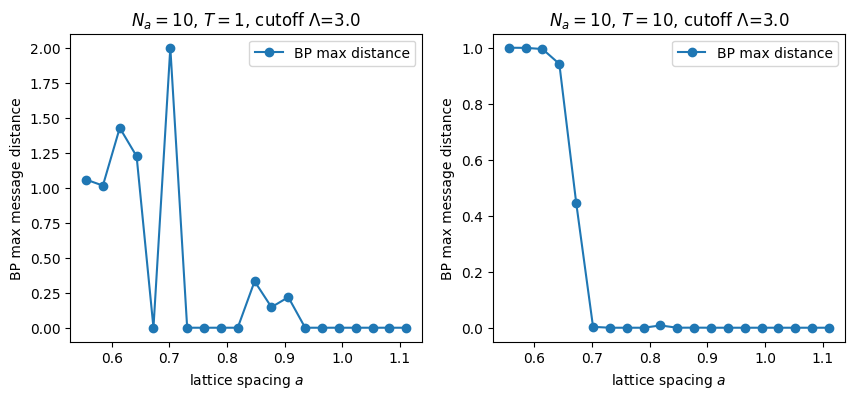

In [3]:
# Plot max_dm vs L
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
for i in range(2):
    ax[i].plot(data_T[i][0], data_T[i][1], 'o-', label=f'BP max distance')
    ax[i].set_xlabel(r'lattice spacing $a$')
    ax[i].set_ylabel(f'BP max message distance')
    ax[i].set_title(f'$N_a={N_a}$, $T={T_list[i]}$, cutoff $\Lambda$={cutoff}')
    ax[i].legend()
plt.show()

Successfully built the HTN.


max_dm=nan: 100%|██████████| 300/300 [00:00<00:00, 553.39it/s]


L=0.1, T=0.1, Entropy = nan, Converged=False
Successfully built the HTN.


max_dm=nan: 100%|██████████| 300/300 [00:00<00:00, 540.30it/s]


L=0.25263157894736843, T=0.1, Entropy = nan, Converged=False
Successfully built the HTN.


max_dm=nan: 100%|██████████| 300/300 [00:00<00:00, 491.06it/s]


L=0.4052631578947369, T=0.1, Entropy = nan, Converged=False
Successfully built the HTN.


max_dm=nan: 100%|██████████| 300/300 [00:00<00:00, 546.69it/s]


L=0.5578947368421052, T=0.1, Entropy = nan, Converged=False
Successfully built the HTN.


max_dm=nan: 100%|██████████| 300/300 [00:00<00:00, 538.82it/s]


L=0.7105263157894737, T=0.1, Entropy = nan, Converged=False
Successfully built the HTN.


max_dm=nan: 100%|██████████| 300/300 [00:00<00:00, 547.37it/s]


L=0.8631578947368421, T=0.1, Entropy = nan, Converged=False
Successfully built the HTN.


max_dm=nan: 100%|██████████| 300/300 [00:00<00:00, 498.29it/s]


L=1.0157894736842106, T=0.1, Entropy = nan, Converged=False
Successfully built the HTN.


max_dm=0.0:   4%|▎         | 11/300 [00:00<00:00, 416.57it/s]


L=1.168421052631579, T=0.1, Entropy = 1983.101333895072, Converged=True
Successfully built the HTN.


max_dm=1.9999994431073649: 100%|██████████| 300/300 [00:00<00:00, 531.49it/s]


L=1.3210526315789475, T=0.1, Entropy = -1662.349097560803, Converged=False
Successfully built the HTN.


max_dm=1.9999999999979923: 100%|██████████| 300/300 [00:00<00:00, 527.57it/s]


L=1.473684210526316, T=0.1, Entropy = -631.6806786688062, Converged=False
Successfully built the HTN.


max_dm=1.9999999999979923: 100%|██████████| 300/300 [00:00<00:00, 549.49it/s]


L=1.6263157894736844, T=0.1, Entropy = -585.4370650888295, Converged=False
Successfully built the HTN.


max_dm=1.9999999999979923: 100%|██████████| 300/300 [00:00<00:00, 371.48it/s]


L=1.7789473684210528, T=0.1, Entropy = 91.78108212150718, Converged=False
Successfully built the HTN.


max_dm=3.236809908643834e-11:   2%|▏         | 6/300 [00:00<00:00, 346.40it/s]


L=1.931578947368421, T=0.1, Entropy = 236.68168497220805, Converged=True
Successfully built the HTN.


max_dm=0.0:   1%|          | 3/300 [00:00<00:01, 277.73it/s]


L=2.0842105263157893, T=0.1, Entropy = 523.6531000398015, Converged=True
Successfully built the HTN.


max_dm=0.0:   1%|          | 3/300 [00:00<00:01, 228.82it/s]


L=2.236842105263158, T=0.1, Entropy = 570.3776378605263, Converged=True
Successfully built the HTN.


max_dm=0.0:   1%|          | 3/300 [00:00<00:02, 129.60it/s]


L=2.3894736842105266, T=0.1, Entropy = 478.959914697357, Converged=True
Successfully built the HTN.


max_dm=1.1751016826266891e-14:   1%|          | 3/300 [00:00<00:01, 279.30it/s]

L=2.542105263157895, T=0.1, Entropy = 370.64205210263464, Converged=True


Successfully built the HTN.


max_dm=1.8013479596845627e-11:   1%|          | 3/300 [00:00<00:01, 213.53it/s]


L=2.694736842105263, T=0.1, Entropy = 277.7123681312514, Converged=True
Successfully built the HTN.


max_dm=4.5255466041282943e-14:   1%|▏         | 4/300 [00:00<00:01, 222.29it/s]


L=2.8473684210526318, T=0.1, Entropy = 208.89302850436795, Converged=True
Successfully built the HTN.


max_dm=8.106218474246418e-11:   1%|▏         | 4/300 [00:00<00:01, 236.85it/s]


L=3.0, T=0.1, Entropy = 156.29135821972395, Converged=True


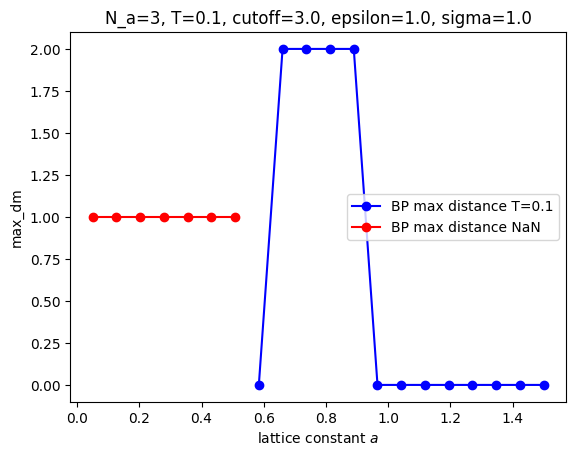

Successfully built the HTN.


max_dm=0.06991357131624065: 100%|██████████| 300/300 [00:00<00:00, 526.49it/s]


L=0.1, T=1, Entropy = 500.21157770847856, Converged=False
Successfully built the HTN.


max_dm=0.06991357131624065: 100%|██████████| 300/300 [00:00<00:00, 542.32it/s]


L=0.25263157894736843, T=1, Entropy = 500.21157770847856, Converged=False
Successfully built the HTN.


max_dm=0.06991357131624065: 100%|██████████| 300/300 [00:00<00:00, 547.29it/s]


L=0.4052631578947369, T=1, Entropy = 500.21157770847856, Converged=False
Successfully built the HTN.


max_dm=0.7266356293357727: 100%|██████████| 300/300 [00:00<00:00, 550.27it/s]


L=0.5578947368421052, T=1, Entropy = 495.1078919406244, Converged=False
Successfully built the HTN.


max_dm=1.2133572016478849: 100%|██████████| 300/300 [00:00<00:00, 536.68it/s]


L=0.7105263157894737, T=1, Entropy = 439.3430524314288, Converged=False
Successfully built the HTN.


max_dm=1.1836903539368713: 100%|██████████| 300/300 [00:00<00:00, 526.81it/s]


L=0.8631578947368421, T=1, Entropy = 288.1132981181058, Converged=False
Successfully built the HTN.


max_dm=1.9999897477138575: 100%|██████████| 300/300 [00:00<00:00, 540.95it/s]


L=1.0157894736842106, T=1, Entropy = 147.0025976349706, Converged=False
Successfully built the HTN.


max_dm=9.847656023964646e-11:  20%|█▉        | 59/300 [00:00<00:00, 523.85it/s] 


L=1.168421052631579, T=1, Entropy = 198.6671064408082, Converged=True
Successfully built the HTN.


max_dm=3.355260513870917e-11:   8%|▊         | 23/300 [00:00<00:00, 454.47it/s]


L=1.3210526315789475, T=1, Entropy = 139.4944817670219, Converged=True
Successfully built the HTN.


max_dm=1.6465107055552153e-11:   6%|▌         | 18/300 [00:00<00:00, 444.23it/s]


L=1.473684210526316, T=1, Entropy = 97.47869047957799, Converged=True
Successfully built the HTN.


max_dm=7.244538302586534e-12:   5%|▌         | 16/300 [00:00<00:00, 422.96it/s]


L=1.6263157894736844, T=1, Entropy = 104.47604734735862, Converged=True
Successfully built the HTN.


max_dm=1.0175554843172563e-11:   6%|▌         | 18/300 [00:00<00:00, 348.77it/s]


L=1.7789473684210528, T=1, Entropy = 101.81739583301284, Converged=True
Successfully built the HTN.


max_dm=6.052713885651428e-11:  10%|▉         | 29/300 [00:00<00:00, 321.69it/s]


L=1.931578947368421, T=1, Entropy = 25.364489595994485, Converged=True
Successfully built the HTN.


max_dm=7.601475005003522e-12:   3%|▎         | 9/300 [00:00<00:00, 300.82it/s]


L=2.0842105263157893, T=1, Entropy = 52.67574964033502, Converged=True
Successfully built the HTN.


max_dm=4.3319070552882977e-11:   3%|▎         | 8/300 [00:00<00:01, 234.01it/s]


L=2.236842105263158, T=1, Entropy = 57.23571436249319, Converged=True
Successfully built the HTN.


max_dm=6.409747732583071e-12:   3%|▎         | 10/300 [00:00<00:01, 267.44it/s]


L=2.3894736842105266, T=1, Entropy = 48.29757217574362, Converged=True
Successfully built the HTN.


max_dm=1.3149148436752967e-11:   4%|▍         | 12/300 [00:00<00:01, 264.18it/s]


L=2.542105263157895, T=1, Entropy = 38.05198264838857, Converged=True
Successfully built the HTN.


max_dm=5.1297688319351664e-11:   5%|▍         | 14/300 [00:00<00:01, 237.10it/s]


L=2.694736842105263, T=1, Entropy = 29.99342743010058, Converged=True
Successfully built the HTN.


max_dm=9.224018771014642e-11:   5%|▌         | 16/300 [00:00<00:01, 259.01it/s]


L=2.8473684210526318, T=1, Entropy = 24.94922197933598, Converged=True
Successfully built the HTN.


max_dm=2.745714766660967e-11:   6%|▌         | 17/300 [00:00<00:01, 261.86it/s]


L=3.0, T=1, Entropy = 21.999726667036096, Converged=True


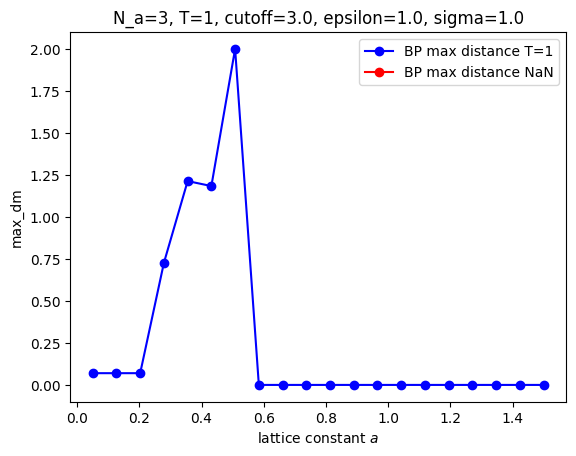

Successfully built the HTN.


max_dm=0.8281816667967775: 100%|██████████| 300/300 [00:00<00:00, 508.11it/s]


L=0.1, T=10, Entropy = 32.16909207927151, Converged=False
Successfully built the HTN.


max_dm=0.8281816667967775: 100%|██████████| 300/300 [00:00<00:00, 552.43it/s]


L=0.25263157894736843, T=10, Entropy = 32.16909207927151, Converged=False
Successfully built the HTN.


max_dm=0.8281816667967775: 100%|██████████| 300/300 [00:00<00:00, 550.69it/s]


L=0.4052631578947369, T=10, Entropy = 32.16909207927151, Converged=False
Successfully built the HTN.


max_dm=0.9635183864370307: 100%|██████████| 300/300 [00:00<00:00, 534.60it/s]


L=0.5578947368421052, T=10, Entropy = 32.05968482517728, Converged=False
Successfully built the HTN.


max_dm=0.9957697390844698: 100%|██████████| 300/300 [00:00<00:00, 518.95it/s]


L=0.7105263157894737, T=10, Entropy = 31.574789096305004, Converged=False
Successfully built the HTN.


max_dm=0.6725184820210717: 100%|██████████| 300/300 [00:00<00:00, 536.15it/s]


L=0.8631578947368421, T=10, Entropy = 35.292959594929044, Converged=False
Successfully built the HTN.


max_dm=8.081479929700208e-11:  29%|██▉       | 87/300 [00:00<00:00, 532.28it/s]


L=1.0157894736842106, T=10, Entropy = 34.61351864717483, Converged=True
Successfully built the HTN.


max_dm=9.078456042477256e-11:  24%|██▍       | 73/300 [00:00<00:00, 500.17it/s] 


L=1.168421052631579, T=10, Entropy = 30.299728660306048, Converged=True
Successfully built the HTN.


max_dm=9.346595719605943e-11:  14%|█▍        | 43/300 [00:00<00:00, 501.85it/s]


L=1.3210526315789475, T=10, Entropy = 25.254675897722695, Converged=True
Successfully built the HTN.


max_dm=9.960171576395283e-11:  10%|█         | 31/300 [00:00<00:00, 440.39it/s]

L=1.473684210526316, T=10, Entropy = 21.391365878458977, Converged=True


Successfully built the HTN.


max_dm=6.464434543218545e-11:  12%|█▏        | 36/300 [00:00<00:00, 470.07it/s]


L=1.6263157894736844, T=10, Entropy = 21.38940436383823, Converged=True
Successfully built the HTN.


max_dm=7.921197031635074e-11:  12%|█▏        | 35/300 [00:00<00:00, 313.85it/s]


L=1.7789473684210528, T=10, Entropy = 21.760197335577125, Converged=True
Successfully built the HTN.


max_dm=5.31233945721965e-11:   4%|▍         | 12/300 [00:00<00:00, 290.78it/s]


L=1.931578947368421, T=10, Entropy = 18.751865890653182, Converged=True
Successfully built the HTN.


max_dm=1.5944967568515267e-11:   4%|▎         | 11/300 [00:00<00:01, 251.74it/s]


L=2.0842105263157893, T=10, Entropy = 19.005595631958485, Converged=True
Successfully built the HTN.


max_dm=2.7160829141337217e-11:   4%|▎         | 11/300 [00:00<00:01, 239.49it/s]


L=2.236842105263158, T=10, Entropy = 19.06452809477336, Converged=True
Successfully built the HTN.


max_dm=3.712841145642187e-11:   3%|▎         | 10/300 [00:00<00:01, 231.45it/s]


L=2.3894736842105266, T=10, Entropy = 18.956365015567, Converged=True
Successfully built the HTN.


max_dm=5.699757332777722e-11:   3%|▎         | 9/300 [00:00<00:01, 264.47it/s]


L=2.542105263157895, T=10, Entropy = 18.856008460552676, Converged=True
Successfully built the HTN.


max_dm=3.4013181160474915e-11:   3%|▎         | 8/300 [00:00<00:01, 234.72it/s]

L=2.694736842105263, T=10, Entropy = 18.792680149147177, Converged=True


Successfully built the HTN.


max_dm=5.134337399681499e-12:   3%|▎         | 8/300 [00:00<00:01, 222.90it/s]


L=2.8473684210526318, T=10, Entropy = 18.758213692855485, Converged=True
Successfully built the HTN.


max_dm=1.3912981877695074e-11:   2%|▏         | 7/300 [00:00<00:00, 322.51it/s]


L=3.0, T=10, Entropy = 18.73894651330719, Converged=True


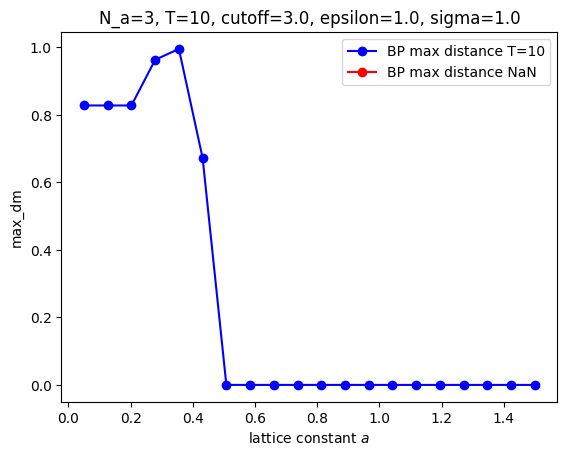

Successfully built the HTN.


max_dm=0.7313471788011388: 100%|██████████| 300/300 [00:00<00:00, 539.19it/s]


L=0.1, T=20, Entropy = 28.18569212152506, Converged=False
Successfully built the HTN.


max_dm=0.7313471788011388: 100%|██████████| 300/300 [00:00<00:00, 478.63it/s]


L=0.25263157894736843, T=20, Entropy = 28.18569212152506, Converged=False
Successfully built the HTN.


max_dm=0.731347178801141: 100%|██████████| 300/300 [00:00<00:00, 532.46it/s] 


L=0.4052631578947369, T=20, Entropy = 28.185692121524877, Converged=False
Successfully built the HTN.


max_dm=0.781848457668257: 100%|██████████| 300/300 [00:00<00:00, 544.44it/s] 


L=0.5578947368421052, T=20, Entropy = 28.317311698922133, Converged=False
Successfully built the HTN.


max_dm=0.5491697653575015: 100%|██████████| 300/300 [00:00<00:00, 560.67it/s]


L=0.7105263157894737, T=20, Entropy = 31.43177645818964, Converged=False
Successfully built the HTN.


max_dm=9.023418123810245e-11:  28%|██▊       | 84/300 [00:00<00:00, 531.22it/s]


L=0.8631578947368421, T=20, Entropy = 27.385421665366867, Converged=True
Successfully built the HTN.


max_dm=5.993155971495412e-11:  14%|█▍        | 42/300 [00:00<00:00, 500.23it/s]


L=1.0157894736842106, T=20, Entropy = 24.787074570490095, Converged=True
Successfully built the HTN.


max_dm=8.21666623629369e-11:  11%|█         | 33/300 [00:00<00:00, 414.53it/s]


L=1.168421052631579, T=20, Entropy = 22.930103894032204, Converged=True
Successfully built the HTN.


max_dm=4.0242087440134355e-11:   8%|▊         | 23/300 [00:00<00:00, 512.07it/s]

L=1.3210526315789475, T=20, Entropy = 20.919685812128076, Converged=True


Successfully built the HTN.


max_dm=4.584571611232491e-11:   6%|▌         | 17/300 [00:00<00:00, 433.50it/s]


L=1.473684210526316, T=20, Entropy = 19.51536421161003, Converged=True
Successfully built the HTN.


max_dm=7.912737132187431e-11:   6%|▌         | 18/300 [00:00<00:00, 412.12it/s]


L=1.6263157894736844, T=20, Entropy = 19.51358305399548, Converged=True
Successfully built the HTN.


max_dm=4.169425915634406e-11:   6%|▌         | 18/300 [00:00<00:00, 328.90it/s]


L=1.7789473684210528, T=20, Entropy = 19.640987278312753, Converged=True
Successfully built the HTN.


max_dm=3.441158469286165e-11:   3%|▎         | 9/300 [00:00<00:00, 302.83it/s]


L=1.931578947368421, T=20, Entropy = 18.724240616434045, Converged=True
Successfully built the HTN.


max_dm=7.634748389051538e-11:   3%|▎         | 8/300 [00:00<00:01, 244.73it/s]


L=2.0842105263157893, T=20, Entropy = 18.782825446563223, Converged=True
Successfully built the HTN.


max_dm=2.6693758314877414e-11:   3%|▎         | 8/300 [00:00<00:01, 285.61it/s]


L=2.236842105263158, T=20, Entropy = 18.79625529897502, Converged=True
Successfully built the HTN.


max_dm=3.3981872871180485e-11:   2%|▏         | 7/300 [00:00<00:01, 248.02it/s]


L=2.3894736842105266, T=20, Entropy = 18.771799653581606, Converged=True
Successfully built the HTN.


max_dm=9.153344748824566e-12:   2%|▏         | 7/300 [00:00<00:01, 266.52it/s]


L=2.542105263157895, T=20, Entropy = 18.7486407779787, Converged=True
Successfully built the HTN.


max_dm=7.062000983992789e-11:   2%|▏         | 6/300 [00:00<00:01, 268.91it/s]


L=2.694736842105263, T=20, Entropy = 18.73374291535892, Converged=True
Successfully built the HTN.


max_dm=2.1797674776280473e-11:   2%|▏         | 6/300 [00:00<00:01, 169.33it/s]


L=2.8473684210526318, T=20, Entropy = 18.725508735268633, Converged=True
Successfully built the HTN.


max_dm=6.130762564282577e-12:   2%|▏         | 6/300 [00:00<00:01, 216.32it/s]


L=3.0, T=20, Entropy = 18.720852867365465, Converged=True


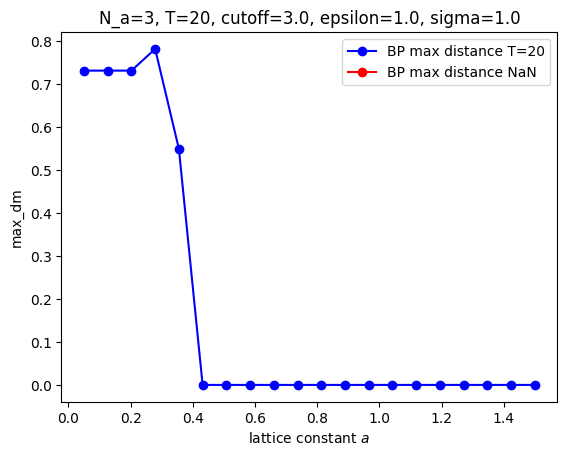

In [224]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import tnmpa.solvers.quimb_vbp as qbp
import sys

L_list = np.linspace(0.1, 3, 20)
T_list = [0.1, 1, 10, 20]

for T in T_list:
    max_dm_list = []
    spaceing_list = []
    max_dm_unconverged_list = []
    spacing_unconverged_list = []
    for L in L_list:
    # L = 1.5
        N_a = 3
        N = N_a**3  # Total number of lattice
        # T = 10
        beta = 1/T

        cutoff = 3.0  # Cutoff distance for LJ potential
        epsilon = 1.0  # Depth of the potential well/ Energy unit scale
        sigma = 1.0  # Length scale in LJ potential, also the distance at which the potential becomes zero

        def contract_HTN_partition(tn):
            """
            Exactly contract the hyper tensor network to get the partition function.
            """
            import quimb.tensor as qtn
            tensor_list = []
            for tensor in tn.tensor_map.values():
                tensor_list.append(tensor)
            value = qtn.tensor_contract(*tensor_list, output_inds=[])
            return value

        tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function_spinrep(
            Lx=L,Ly=L,Lz=L,
            beta=beta,
            Nx=N_a,Ny=N_a,Nz=N_a,
            cutoff=cutoff,
            epsilon=epsilon,
            sigma=sigma,
            # uv_cutoff=False,
            )

        print('Successfully built the HTN.')

        # entropy_exact = np.log(contract_HTN_partition(tn))

        for _ in range(1):
            # BP
            converged = False
            tol = 1e-10
            count = 0
            max_dm = 0
            damping_eta = 0
            max_dm_cache = 0

            messages, converged, max_dm = qbp.run_belief_propagation(
            tn, 
            tol=tol,
            max_iterations=300, 
            progbar=True,
            thread_pool=8,
            uniform=False,
            damping=True,
            eta=damping_eta,
            show_max_dm=True,
            )
            import math
            if math.isnan(max_dm):
                max_dm = 1.0
                max_dm_unconverged_list.append(max_dm)
                spacing_unconverged_list.append(L/(N_a-1))
            else:
                max_dm_list.append(max_dm)
                spaceing_list.append(L/(N_a-1))

            entropy_bp = qbp.compute_free_entropy_from_messages(tn, messages)

            if damping_eta > 0:
                print(f'L={L}, T={T}, Entropy = {entropy_bp}, Converged={converged}, damping={damping_eta}')
            else:
                print(f'L={L}, T={T}, Entropy = {entropy_bp}, Converged={converged}')

            # print('Exact Entropy:',entropy_exact)

    # Plot max_dm vs L
    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(spaceing_list, max_dm_list, 'o-', label=f'BP max distance T={T}', color='b')
    ax.plot(spacing_unconverged_list, max_dm_unconverged_list, 'o-', label=f'BP max distance NaN', color='r')
    ax.set_xlabel(r'lattice constant $a$')
    ax.set_ylabel('max_dm')
    ax.set_title(f'N_a={N_a}, T={T}, cutoff={cutoff}, epsilon={epsilon}, sigma={sigma}')
    ax.legend()
    plt.show()



### Time cost of constructing the 3D partition function TN

By simple approximation, we compute the number of edges in the TN:
\begin{equation}
N_e \approx \frac{{N_a}^3}{a^3}\cdot V
\end{equation}
where $a=L/N_a$ is the lattice spacing, and $V=\frac{2}{3}\pi \Lambda^3$ is the volume of the interaction block ($\Lambda$ is the cutoff radius).

We approximate the time cost to be proportional to the number of edges in the TN, and the proportionality constant is determined by the time cost of constructing a single edge.
\begin{equation}
C_{TN} = C_{edge} \cdot N_e
\end{equation}
The time cost has expression:
\begin{equation}
C_{TN} \approx C_{edge} \cdot \frac{L^3}{a^6}\cdot V = C_{edge} \cdot \frac{{N_a}^6}{L^3} \cdot V = C_{edge} \cdot \frac{{N_a}^3}{a^3} \cdot V
\end{equation}
When we fix the system size $L$, the time cost is proportional to $N_a^6$ (or $a^{-6}$). When fixing the lattice spacing $a$, the time cost is proportional to $L^3$.



In [228]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import tnmpa.solvers.quimb_vbp as qbp
import sys
import time

a = 0.75
N_a_list = np.array([5, 10, 15, 20, 25, 30], dtype=int)
time_cost = []
for N_a in N_a_list:
    L = int((N_a-1)*a)
    N = N_a**3  # Total number of lattice
    T = 10
    beta = 1/T

    cutoff = 3.0  # Cutoff distance for LJ potential
    epsilon = 1.0  # Depth of the potential well/ Energy unit scale
    sigma = 1.0  # Length scale in LJ potential, also the distance at which the potential becomes zero
    t0 = time.time()
    tn = qtn.tensor_builder.HTN3D_classical_LennardJones_partition_function(
        Lx=L,Ly=L,Lz=L,
        beta=beta,
        Nx=N_a,Ny=N_a,Nz=N_a,
        cutoff=cutoff,
        epsilon=epsilon,
        sigma=sigma,
        uv_cutoff=False,
        )
    t1 = time.time()
    time_cost.append(t1-t0)

    print('Successfully built the HTN.')



Successfully built the HTN.
Successfully built the HTN.
Successfully built the HTN.
Successfully built the HTN.
Successfully built the HTN.
Successfully built the HTN.


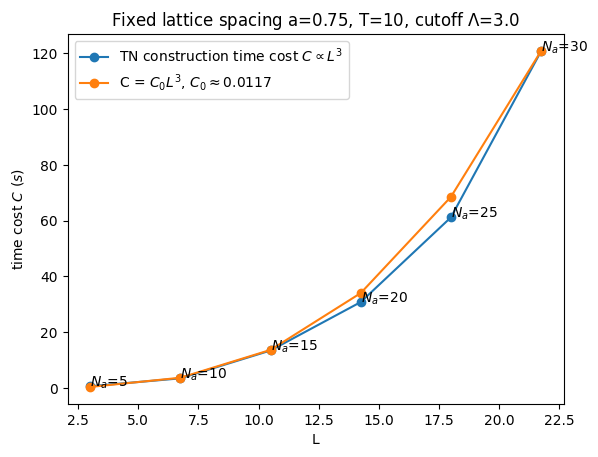

In [246]:
import matplotlib.pyplot as plt

L_list = []
for N_a in N_a_list:
    L_list.append((N_a-1)*a)
prefactor = 120.903/21.75**3
L_cubic = prefactor*np.array(L_list)**3

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(L_list, time_cost, 'o-', label=r'TN construction time cost $C\propto L^3$')
ax.plot(L_list, L_cubic, 'o-', label=r'C = $C_0 L^3$, $C_0\approx 0.0117$')
# At each point, plot the number of N_a
for i, txt in enumerate(N_a_list):
    ax.annotate(rf'$N_a$={txt}', (L_list[i], time_cost[i]))
ax.set_xlabel(r'L')
ax.set_ylabel(r'time cost $C$ ($s$)')
ax.set_title(f'Fixed lattice spacing a={a}, T={T}, cutoff $\Lambda$={cutoff}')
ax.legend()
plt.show()


In [12]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import tnmpa.solvers.quimb_vbp as qbp
import sys
import time

N_a = 3
a = 0.75
L = (N_a-1)*a
N = N_a**3  # Total number of lattice
T = 10
beta = 1/T

cutoff = 3.0  # Cutoff distance for LJ potential
epsilon = 1.0  # Depth of the potential well/ Energy unit scale
sigma = 1.0  # Length scale in LJ potential, also the distance at which the potential becomes zero
t0 = time.time()
tn = qtn.tensor_builder.HTN2D_classical_LennardJones_partition_function(
    Lx=L,Ly=L,
    beta=beta,
    Nx=N_a,Ny=N_a,
    cutoff=cutoff,
    epsilon=epsilon,
    sigma=sigma,
    uv_cutoff=False,
    )

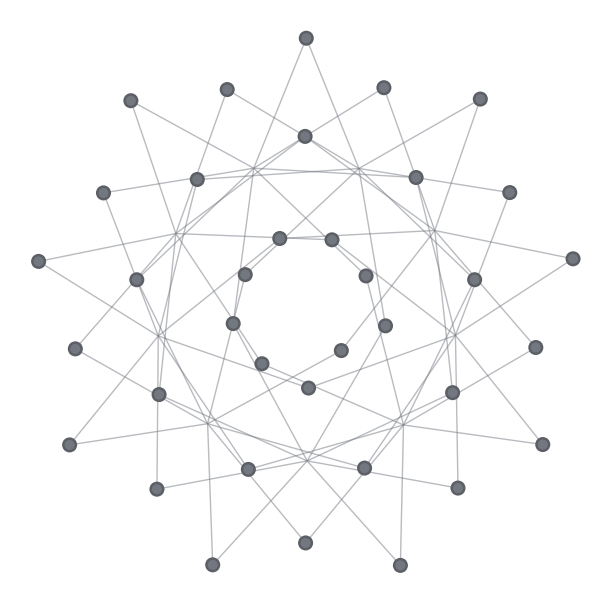

In [13]:
tn.draw()